In [15]:


#load data
import pickle

with open("Integrated_prediction_hype1_test57.pkl", "rb") as fp:
    results= pickle.load(fp)

with open("y_test_57.pkl", "rb") as fp:
    y_test= pickle.load(fp)


In [2]:
results

42308    [DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜN...
19743    [DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, Tek...
26134    [SPOR, SPOR, SPOR, SPOR, SPOR, SPOR, SANAT, SA...
36274    [SPOR, SPOR, SPOR, SPOR, SPOR, SPOR, DÜNYA, DÜ...
39013    [Teknoloji, Teknoloji, Teknoloji, Teknoloji, T...
                               ...                        
19154    [DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜN...
19512    [SPOR, SPOR, Teknoloji, Teknoloji, Teknoloji, ...
23092    [SANAT, SANAT, SANAT, SANAT, SANAT, SANAT, SPO...
17335    [SANAT, SANAT, SANAT, SANAT, SANAT, SANAT, SAN...
22839    [DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, DÜNYA, Tek...
Name: Title, Length: 2325, dtype: object

In [4]:
def result_to_predict(result,j):
    p=[]
    for i in result:
        p.append(i[j])
        
    predict=pd.Series(p,index=result.index)
    return predict

In [9]:
import pandas as pd
result_to_predict(results,2)

42308        DÜNYA
19743        DÜNYA
26134         SPOR
36274         SPOR
39013    Teknoloji
           ...    
19154        DÜNYA
19512    Teknoloji
23092        SANAT
17335        SANAT
22839        DÜNYA
Length: 2325, dtype: object

In [16]:



from sklearn.metrics import confusion_matrix,  accuracy_score

def acc_sc_hype(test,result):
    n=len(result[result.index[0]])
    output=[]
    for i in range(0,n):
        output.append(round(accuracy_score(test,result_to_predict(result,i)),4))
        
        
    return output




In [31]:
acc_score_all=acc_sc_hype(y_test,results)

In [75]:
main_categories=["DÜNYA","SPOR","SANAT","Teknoloji"]

acc_all_with_cat=[acc_score_all]

for category in main_categories:
    cat_ind=y_test[y_test==category].index
    cat_test_y=y_test[cat_ind]
    cat_results=results[cat_ind]
    acc_all_with_cat.append(acc_sc_hype(cat_test_y,cat_results))
    


acc_all_with_cat





[[0.5256,
  0.5282,
  0.5346,
  0.5424,
  0.5424,
  0.5535,
  0.5617,
  0.5677,
  0.5712,
  0.6125,
  0.5256],
 [0.5185,
  0.5174,
  0.5201,
  0.5195,
  0.513,
  0.5228,
  0.5223,
  0.5168,
  0.5125,
  0.5662,
  0.5185],
 [0.5664,
  0.5865,
  0.609,
  0.6441,
  0.6692,
  0.6892,
  0.7419,
  0.782,
  0.8095,
  0.817,
  0.5664],
 [0.5536,
  0.5536,
  0.5714,
  0.5893,
  0.5893,
  0.5893,
  0.5714,
  0.6607,
  0.7321,
  0.6429,
  0.5536],
 [0.3571,
  0.3571,
  0.3571,
  0.5,
  0.5714,
  0.5714,
  0.5714,
  0.6786,
  0.7143,
  0.6786,
  0.3571]]

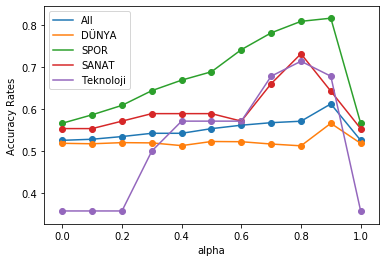

In [78]:
import numpy as np
import matplotlib.pyplot as plt
x=[ round(i*0.1,1) for i in range(0,11) ]

plt.plot(x, acc_all_with_cat[0],label = "All")
plt.scatter(x, acc_all_with_cat[0])
plt.plot(x, acc_all_with_cat[1],label = "DÜNYA")
plt.scatter(x, acc_all_with_cat[1])

plt.plot(x, acc_all_with_cat[2],label = "SPOR")
plt.scatter(x, acc_all_with_cat[2])
plt.plot(x, acc_all_with_cat[3],label = "SANAT")
plt.scatter(x, acc_all_with_cat[3])

plt.plot(x, acc_all_with_cat[4],label ="Teknoloji")
plt.scatter(x, acc_all_with_cat[4])

plt.xlabel("alpha")
plt.ylabel("Accuracy Rates")

plt.legend()
plt.show()

In [77]:
alpha=x
beta=[round(1-i,1) for i in alpha]

All_list=acc_all_with_cat.copy()
All_list.insert(0,beta)
All_list.insert(0,alpha)


import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['alpha', 'beta',"All","DÜNYA","SPOR","SANAT","Teknoloji"]),
                 cells=dict(values=All_list))
                     ])
fig.show()
#Accuracy Rates of Categories and all under alpha-beta value

In [73]:
[i*pi/2 for i in alpha]

NameError: name 'pi' is not defined

in_array :  [-6.28318531 -5.62179738 -4.96040945 -4.29902153 -3.6376336  -2.97624567
 -2.31485774 -1.65346982 -0.99208189 -0.33069396  0.33069396  0.99208189
  1.65346982  2.31485774  2.97624567  3.6376336   4.29902153  4.96040945
  5.62179738  6.28318531]

out_array :  [1.0, 0.7891405093963934, 0.2454854871407988, -0.40169542465296987, -0.8794737512064891, -0.9863613034027223, -0.6772815716257412, -0.08257934547233249, 0.5469481581224268, 0.9458172417006346, 0.9458172417006346, 0.5469481581224268, -0.0825793454723316, -0.6772815716257405, -0.9863613034027223, -0.8794737512064893, -0.40169542465296987, 0.2454854871407988, 0.7891405093963934, 1.0]


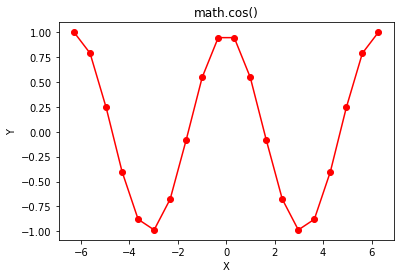

In [72]:
import math  
math.cos((3.14)/2)


%matplotlib inline
# Python program showing  
# Graphical representation of  
# cos() function  
import math 
import numpy as np 
import matplotlib.pyplot as plt  
  
in_array = np.linspace(-(2 * np.pi), 2 * np.pi, 20) 
  
out_array = [] 
  
for i in range(len(in_array)): 
    out_array.append(math.cos(in_array[i])) 
    i += 1
  
   
print("in_array : ", in_array)  
print("\nout_array : ", out_array)  
  
# red for numpy.sin()  
plt.plot(in_array, out_array, color = 'red', marker = "o")  
plt.title("math.cos()")  
plt.xlabel("X")  
plt.ylabel("Y")  
plt.show()  

In [71]:
plt.show()  

In [94]:

#get number of non-unique predictions
k=0
index_list=[]
for i in range(0,len(results1)):
    if len(list(set(results1[results1.index[i]])))!=1:
        index_list.append(results1.index[i])
        k=k+1
print(k)
print(len(results1))



728
2325


In [95]:
index_list

[19743,
 38035,
 37518,
 27047,
 38368,
 20350,
 34518,
 33757,
 15401,
 12886,
 30312,
 24771,
 19777,
 36548,
 32502,
 14035,
 13995,
 41778,
 32247,
 40712,
 35206,
 41199,
 22563,
 38094,
 15831,
 28468,
 33375,
 36369,
 40342,
 40092,
 31510,
 37884,
 23121,
 22542,
 27659,
 33080,
 29801,
 22945,
 33020,
 17161,
 37544,
 32001,
 27413,
 22018,
 35167,
 38166,
 25006,
 18177,
 33097,
 23210,
 40171,
 28306,
 37951,
 20442,
 32081,
 24850,
 38167,
 32108,
 15057,
 18055,
 29654,
 25257,
 37436,
 38724,
 21352,
 37743,
 35792,
 37714,
 31987,
 24665,
 33501,
 37978,
 35944,
 35506,
 38631,
 43477,
 18164,
 23049,
 14643,
 16308,
 19092,
 20780,
 32984,
 34422,
 21732,
 14943,
 31832,
 31672,
 33441,
 20556,
 27314,
 15343,
 29312,
 43387,
 29643,
 23021,
 40690,
 31022,
 42682,
 21475,
 23813,
 26792,
 35789,
 42500,
 43456,
 25437,
 20883,
 34479,
 13391,
 25516,
 41088,
 20877,
 31127,
 22039,
 26106,
 24189,
 38128,
 30630,
 40519,
 20277,
 36251,
 29863,
 32986,
 40964,
 42194,


In [97]:



n=18177

print(results1[n])

for j in range(0,len(predict_list1)):
    print(predict_list1[j][n])




['DÜNYA', 'DÜNYA', 'DÜNYA', 'DÜNYA', 'Teknoloji', 'Teknoloji', 'Teknoloji', 'Teknoloji', 'DÜNYA', 'DÜNYA', 'DÜNYA', 'DÜNYA']
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
DÜNYA
